# Strain Variation Analysis

Last updated: 2024-10-15 RP

In this notebook, we process the genome annotations and generate multiple sequence alignments across genes and promoter regions. This notebook assumes there's an existing file infrastructure, where in the folder where this file is located, there is a directory named 'data' with subdirectories named 'gene_regions', 'gene_alignments', 'promoter_regions', 'promoter_alignments', and 'annotationresults'. The current working directory should also contain the files: 
- 'SEQTOOLS.py'
- 'bakta_annotationDF.csv'




### In the section below, make sure that we only import things that are strictly necessary...

In [109]:
import pandas as pd
import SEQTOOLS
import numpy as np
from io import StringIO
from Bio import AlignIO
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline
import os
import warnings
import matplotlib.pyplot as plt 
import datetime
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO
import time


DIRPROMOTERREGION="data/promoter_regions"
DIRPROMOTERALIGNMENT="data/promoter_alignments"
DIRGENEALIGNMENT="data/gene_alignments"
DIRGENEREGION = "data/gene_regions"

import os

if not os.path.exists(DIRPROMOTERREGION):
    os.makedirs(DIRPROMOTERREGION)

# # I think these can all go,b ut double check:
# import panel as pn
# import panel.widgets as pnw
# pn.extension()
# from bokeh.plotting import figure
# from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
# from bokeh.models.glyphs import Text, Rect
# from bokeh.layouts import gridplot

In [110]:
SEQTOOLS.get_simple_annotation

<function SEQTOOLS.get_simple_annotation(row, outputoption='homologuesource')>

## Read in annotation data and generate a smaller version

In [116]:
# read in annotation DF, drop old index columns, and set the variable 'ID' to the row's index:
annotationDF=pd.read_csv("./bakta_annotationDF.csv", delimiter='\t')
# annotationDF.drop(['Unnamed: 0.1','Unnamed: 0.2'],axis=1,inplace=True)
annotationDF['entryID'] = annotationDF.index

# drop sequence data to create a smaller version:
annotation_simplifiedDF=annotationDF.drop(['aa_sequence','nt_sequence'],axis=1)

# add annotation inference data to simplified version:
# (the lines below require the get_simple_annotation function from SEQTOOLS.py)
annotation_simplifiedDF['inference_source'] = annotation_simplifiedDF.apply(SEQTOOLS.get_simple_annotation, axis=1)
annotation_simplifiedDF['inference_sourceID'] = annotation_simplifiedDF.apply(SEQTOOLS.get_simple_annotation, axis=1,outputoption="homologueinfo")

display(annotation_simplifiedDF)



# # Moved the section below to SEQTOOLS in the ecor_strains location, should be safe to remove here:
# def get_simple_annotation(row,outputoption="homologuesource"):
#     infc=str(row['inference'])
#     if "similar to AA sequence:MG1655.gbff" in infc:
#         infout="MG1655ref"
#         homologinfo=infc.split("similar to AA sequence:MG1655.gbff")[1]
#     elif "similar to AA sequence:UniProtKB" in infc:
#         infout="UNIPROT"
#         homologinfo=infc.split("similar to AA sequence:UniProtKB")[1]
#     elif "ab initio prediction:Prodigal" in infc and len(infc) == len("ab initio prediction:Prodigal:002006"):
#         infout="no_homologue"
#         homologinfo=np.nan
#     elif "protein motif:HAMAP:" in infc:
#         infout="HAMAP"
#         homologinfo=infc.split("protein motif:HAMAP:")[1]
#     elif "ISfinder" in infc:
#         infout="ISfinder"
#         homologinfo=infc.split("ISfinder")[1]
#     else:
#         infout=infc
#         homologinfo=np.nan
#     if outputoption=="homologueinfo":
#         return homologinfo
#     elif outputoption=="homologuesource":
#         return infout
#     else:
#         pass
# annotation_simplifiedDF['inference_source'] = annotation_simplifiedDF.apply(get_simple_annotation, axis=1)
# annotation_simplifiedDF['inference_sourceID'] = annotation_simplifiedDF.apply(get_simple_annotation, axis=1,outputoption="homologueinfo")
# display(annotationDF['ID'])



/var/folders/v3/dg936b8s0p594tmb2wm_9gsm0000gq/T/ipykernel_49472/432550413.py:2: DtypeWarning: Columns (1,5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  annotationDF=pd.read_csv("./bakta_annotationDF.csv", delimiter='\t')


,Dbxref,Is_circular,K12 name,Name,Note,Parent,Strain,Unnamed: 0,amino_acid,anti_codon,...,EVALUE,IDENTITY,GENE_NAME,COG_NAME,COG_LETTER,COG_DESCRIPTION,genome,entryID,inference_source,inference_sourceID
0,NaN,NaN,NaN,contig_1,NaN,NaN,QOYB01.1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,nan,NaN
1,SO:0001036,NaN,NaN,tRNA-Arg(acg),NaN,NaN,QOYB01.1,1,Arg,acg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,NaN
2,SO:0001036,NaN,NaN,tRNA-Arg(acg),NaN,NaN,QOYB01.1,2,Arg,acg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,nan,NaN
3,SO:0000269,NaN,NaN,tRNA-Ser(gct),NaN,NaN,QOYB01.1,3,Ser,gct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,nan,NaN
4,"ASAP:ABE-0008866,BlastRules:WP_002209449,COG:C...",NaN,NaN,carbon storage regulator,NaN,NaN,QOYB01.1,4,NaN,NaN,...,7.430000e-29,54.237,CsrA,sRNA-binding carbon storage regulator CsrA,T,Signal transduction mechanisms,QOYB01.1,4,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428490,NaN,NaN,NaN,contig_120,NaN,NaN,QOWP01.1,4856,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428490,nan,NaN
428491,"RFAM:RF01830,SO:0000655",NaN,NaN,(3' truncated) Salmonella enterica Typhi npcRN...,NaN,NaN,QOWP01.1,4857,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428491,nan,NaN
428492,SO:0000259,NaN,NaN,tRNA-Glu(ttc),NaN,NaN,QOWP01.1,4858,Glu,ttc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428492,nan,NaN
428493,NaN,NaN,NaN,contig_121,NaN,NaN,QOWP01.1,4859,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428493,nan,NaN


In [119]:
annotationDF.iloc[0]

Dbxref                                   NaN
Is_circular                              NaN
K12 name                                 NaN
Name                                contig_1
Note                                     NaN
Parent                                   NaN
Strain                              QOYB01.1
Unnamed: 0                                 0
aa_sequence                              NaN
amino_acid                               NaN
anti_codon                               NaN
attributes         ID=contig_1;Name=contig_1
end                                 637573.0
gene                                     NaN
gene_ID                             contig_1
inference                                NaN
locus_tag                                NaN
nt_sequence                              NaN
phase                                      .
product                                  NaN
pseudo                                   NaN
score                                      .
seq_id    

In [81]:
##### DELETE!!!
##### THE OLD VERSION!!!

# read in annotation DF, drop old index columns, and set the variable 'ID' to the row's index:
OLDannotationDF=pd.read_csv("../../../strain_seq_variation/data/annotation_summary.csv")
OLDannotationDF.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
OLDannotationDF['ID'] = OLDannotationDF.index
OLDannotationDF.columns
OLDannotationDF['inference'].unique()

array(['ab initio prediction:Prodigal:002006,similar to AA sequence:MG1655.gbff:NP_415521.1',
       'ab initio prediction:Prodigal:002006,similar to AA sequence:MG1655.gbff:NP_415520.1',
       'ab initio prediction:Prodigal:002006,similar to AA sequence:MG1655.gbff:NP_415519.1',
       ...,
       'ab initio prediction:Prodigal:002006,similar to AA sequence:UniProtKB:C1KKR1',
       'ab initio prediction:Prodigal:002006,protein motif:HAMAP:MF_00016',
       'ab initio prediction:Prodigal:002006,similar to AA sequence:UniProtKB:P11409'],
      dtype=object)

## Next, we calculate some general statistics for each strain and visualize

In [7]:
# Here, we iterate thorugh each strain to calculate the number of coding sequences, rRNAs, tRNAs, tmRNAs 
# (transfer-messenger RNA), and repreat regions, the number of regions identified using various 
# inference sources, the number of genes identified but not annotated, chromosome length, and number of contigs. 
annotation_simplifiedDF.sort_values(by=['Strain'],inplace=True)
strainlist=annotation_simplifiedDF['Strain'].unique()
strainlist.sort()

Straininformation=pd.DataFrame({"Strain":strainlist}).set_index('Strain')
bystrains=annotation_simplifiedDF.groupby(["Strain"])
dataframes_bystrain = [group for _, group in bystrains]
for il in range(0,len(dataframes_bystrain)):
    strainc=strainlist[il]
    #provide counts
    Straininformation.at[strainc, 'count_All'] = len(dataframes_bystrain[il]['type'])
    Straininformation.at[strainc, 'count_Named'] = dataframes_bystrain[il]['Name'].isna().value_counts()[False]
    try:
        Straininformation.at[strainc, 'count_Unnamed'] = dataframes_bystrain[il]['Name'].isna().value_counts()[True]
    except:
        Straininformation.at[strainc, 'count_Unnamed'] = 0
    Straininformation.at[strainc, 'count_CDS'] = dataframes_bystrain[il]['type'].value_counts()['CDS']
    Straininformation.at[strainc, 'count_rRNA'] = dataframes_bystrain[il]['type'].value_counts()['rRNA']
    Straininformation.at[strainc, 'count_tRNA'] = dataframes_bystrain[il]['type'].value_counts()['tRNA']
    Straininformation.at[strainc, 'count_tmRNA'] = dataframes_bystrain[il]['type'].value_counts()['tmRNA']
    try:
        Straininformation.at[strainc, 'count_repeat_region'] = dataframes_bystrain[il]['type'].value_counts()['repeat_region']
    except:
        Straininformation.at[strainc, 'count_repeat_region'] = 0
    
    CDSonly=dataframes_bystrain[il].loc[dataframes_bystrain[il]['type']=="CDS"]
    Straininformation.at[strainc, 'number_CDS_no_gene_identified'] = CDSonly['gene'].isna().sum()
    contname,contseq,contlength = SEQTOOLS.get_sequences("data/annotationresults/"+strainc+".fasta")
    Straininformation.at[strainc, 'chromosome_length (Mbp)']=round(np.sum(contlength)/np.power(10.,6.),2)
    Straininformation.at[strainc, 'contig number']=int(np.sum(contlength.shape[0]))
    
    
    ### DELETE INFERENCE SECTION AT SOME POINT?
    # Straininformation.at[strainc, 'inference_MG1655ref']=CDSonly['inference_source'].value_counts()['MG1655ref']
    # Straininformation.at[strainc, 'inference_UNIPROT']=CDSonly['inference_source'].value_counts()['UNIPROT']
    # Straininformation.at[strainc, 'inference_nohomologue']=CDSonly['inference_source'].value_counts()['no_homologue']
    # Straininformation.at[strainc, 'inference_HAMAP']=CDSonly['inference_source'].value_counts()['HAMAP']
    # Straininformation.at[strainc, 'inference_ISfinder']=CDSonly['inference_source'].value_counts()['ISfinder']
    

    #add information about fraction homology found
    # Straininformation['inference_fracMG1655ref']=Straininformation['inference_MG1655ref']/Straininformation['count_CDS']
    # Straininformation['inference_fracHomologues']=(Straininformation['inference_MG1655ref']+Straininformation['inference_UNIPROT']+Straininformation['inference_HAMAP']+Straininformation['inference_ISfinder'])/Straininformation['count_CDS']

    
display(Straininformation.head(20))





,count_All,count_Named,count_Unnamed,count_CDS,count_rRNA,count_tRNA,count_tmRNA,count_repeat_region,number_CDS_no_gene_identified,chromosome_length (Mbp),contig number
Strain,,,,,,,,,,,
EC1,5117.0,5065.0,52.0,4601.0,9.0,89.0,1.0,0.0,460.0,4.92,132.0
EC2,5279.0,5253.0,26.0,4655.0,12.0,85.0,1.0,0.0,470.0,4.95,216.0
EC3,5321.0,5321.0,0.0,4883.0,7.0,76.0,1.0,0.0,879.0,5.14,124.0
EC4,5184.0,5184.0,0.0,4710.0,8.0,73.0,1.0,0.0,745.0,5.07,161.0
EC5,5829.0,5801.0,28.0,5165.0,15.0,86.0,1.0,0.0,969.0,5.38,273.0
EC6,5775.0,5747.0,28.0,5123.0,9.0,87.0,1.0,0.0,948.0,5.36,269.0
EC7,5611.0,5597.0,14.0,4973.0,10.0,93.0,1.0,0.0,653.0,5.22,270.0
EC8,4862.0,4862.0,0.0,4506.0,11.0,73.0,1.0,0.0,585.0,4.83,53.0
MG1655,4816.0,4782.0,34.0,4378.0,22.0,88.0,1.0,0.0,98.0,4.64,1.0


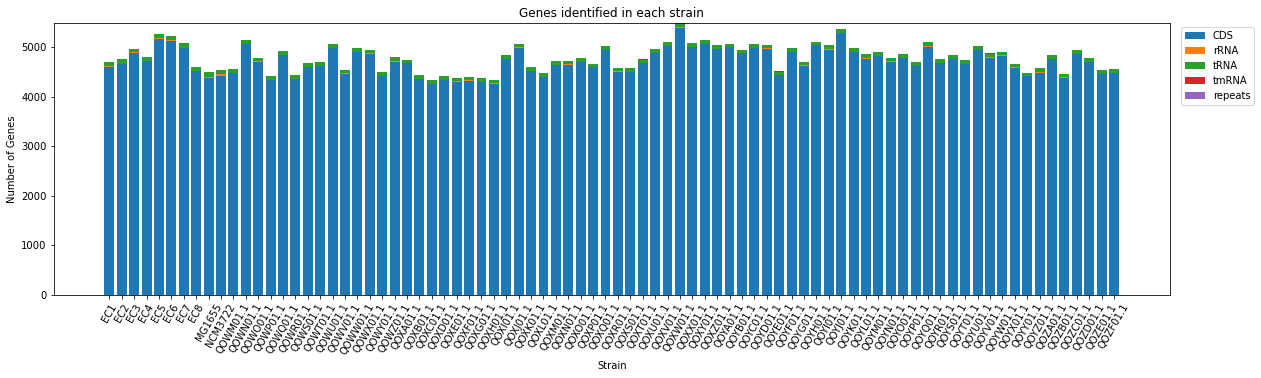

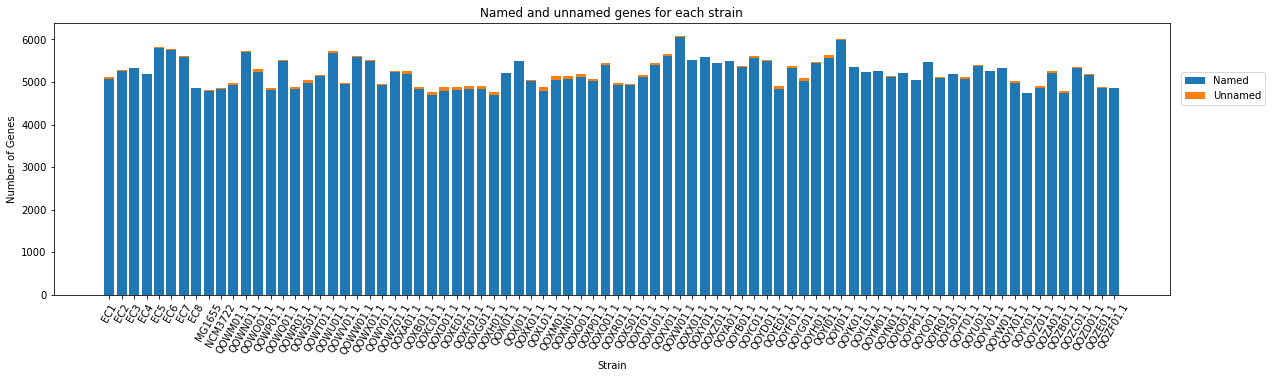

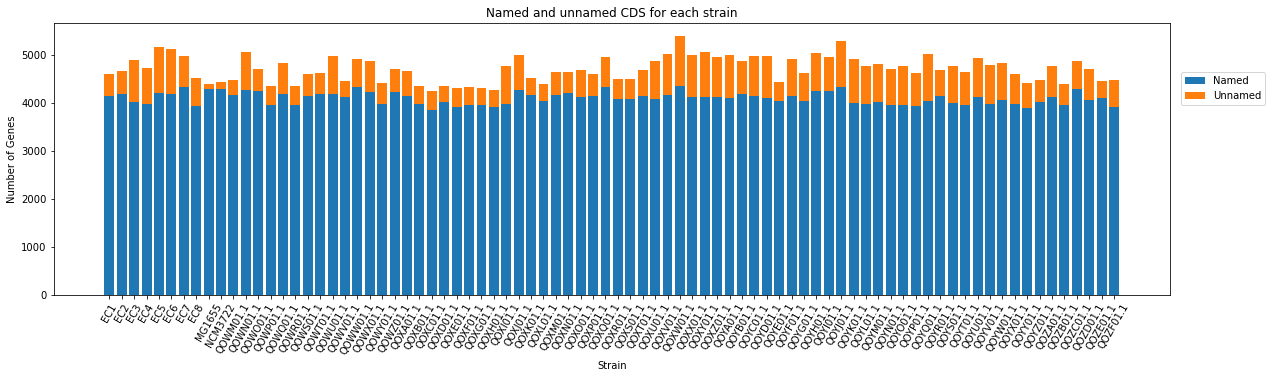

In [8]:
# Plot the number of CDS/rRNAs/tRNAs/tmRNAs/repeat_regions identified for each strain based on annotation status:
plt.figure(figsize = (20, 5))
plt.bar(x = Straininformation.index, bottom = np.zeros_like(Straininformation.index), height = Straininformation['count_CDS'], label = 'CDS')
plt.bar(x = Straininformation.index, bottom = Straininformation['count_CDS'], height = Straininformation['count_rRNA'], label = 'rRNA')
plt.bar(x = Straininformation.index, bottom = Straininformation['count_CDS'] + Straininformation['count_rRNA'], height = Straininformation['count_tRNA'],  label = 'tRNA')
plt.bar(x = Straininformation.index, bottom = Straininformation['count_CDS'] + Straininformation['count_rRNA'] + Straininformation['count_tRNA'], height = Straininformation['count_tmRNA'],  label = 'tmRNA')
plt.bar(x = Straininformation.index, bottom = Straininformation['count_CDS'] + Straininformation['count_rRNA'] + Straininformation['count_tRNA'] + Straininformation['count_tmRNA'], height = Straininformation['count_repeat_region'],  label = 'repeats')

plt.title("Genes identified in each strain")
plt.xticks(range(0, len(Straininformation.index), 1), rotation = 60)
plt.xlabel("Strain",loc = 'center')
plt.ylabel("Number of Genes")
plt.legend(loc = (1.01, 0.7))


# Plot the number of genes (including CDS, rRNAs, tRNAs, tmRNAs, and repeat regions) with/without names identified:
plt.figure(figsize = (20, 5))
plt.bar(x = Straininformation.index, bottom = np.zeros_like(Straininformation.index), height = Straininformation['count_Named'], label = 'Named')
plt.bar(x = Straininformation.index, bottom = Straininformation['count_Named'], height = Straininformation['count_Unnamed'], label = 'Unnamed')

plt.title("Named and unnamed genes for each strain")
plt.xticks(range(0, len(Straininformation.index), 1), rotation = 60)
plt.xlabel("Strain",loc = 'center')
plt.ylabel("Number of Genes")
plt.legend(loc = (1.01, 0.7))


# Plot the number of CDS with/without names identified:
plt.figure(figsize = (20, 5))
plt.bar(x = Straininformation.index, bottom = np.zeros_like(Straininformation.index), height = Straininformation['count_CDS'], label = 'Named')
plt.bar(x = Straininformation.index, bottom = Straininformation['count_CDS'] - Straininformation['number_CDS_no_gene_identified'], height = Straininformation['number_CDS_no_gene_identified'], label = 'Unnamed')

plt.title("Named and unnamed CDS for each strain")
plt.xticks(range(0, len(Straininformation.index), 1), rotation = 60)
plt.xlabel("Strain",loc = 'center')
plt.ylabel("Number of Genes")
plt.legend(loc = (1.01, 0.7))

## DELETE THIS PART (NOT NEEDED FOR BAKTA)
For each gene, calculate its frequency across all strains:
This analysis is slightly complicated by the identification of duplicate genes within a genome. In the even that a gene is found twice in a given genome, one entry will be named 'gene_1' and then next 'gene_2'. Both will then be missed in any search for the gene 'gene' unless these aliases are accounted for. 

In [154]:
# Block to identify allgene_info_noDupses that are found in ALL strains included in this analyses:

    # # find all aliases of the gene:
    # geneAlias = []
    # for entry in allgenelist:
    #     if gene in entry:
    #         if "_" in entry:
    #             geneAlias.append(entry)
    

allgenelist=annotation_simplifiedDF['gene'].unique()
genelist = [x for x in allgenelist if str(x) != 'nan']

gene_info_noDups= pd.DataFrame({'gene':genelist}).set_index('gene')
num_strains=annotation_simplifiedDF['Strain'].unique().shape[0]

for gene in genelist:
     # for each gene, make a temporary list of other names to check:
    geneAlias = []
    for otherGene in genelist:
        if gene in otherGene:
            if "_" in otherGene:
                geneAlias.append(otherGene)
    print(geneAlias)            
                
    # generate a data frame containing rows relating to one gene and its aliases:
    selection_1gene=annotation_simplifiedDF.loc[annotation_simplifiedDF['gene'] ==gene]   

    for Gene in geneAlias:
        selection_1gene = pd.concat((selection_1gene, (annotation_simplifiedDF.loc[(annotation_simplifiedDF['gene'] == Gene)])))  
        
    #print(selection_1gene)
    if selection_1gene["Strain"].is_unique:
        pass
    else:
        print("Warning: %s occurs several times in single strain" % gene)
    
    #gene_info.at[gene,'fraction_strains']=selection_1gene.shape[0]/float(num_strains)
    gene_info_noDups.at[gene,'fraction_strains']=len(set(selection_1gene["Strain"]))/float(num_strains)
gene_info_noDups.sort_index(inplace=True)
#gene_info.to_csv("gene_info.csv")
#display(gene_info_noDups)

# # rough version of the pangenome gene list:
# panGenomeGenes = gene_info.loc[gene_info['fraction_strains'] == 1]
# panGenomeGenes
# #panGenomeGenes.to_csv("2024-01-12_ECOR_pangenome_gene_list.csv")

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

## Generate plots for figure 2:

Text(0.5, 1.0, 'CDS Count Distribution')

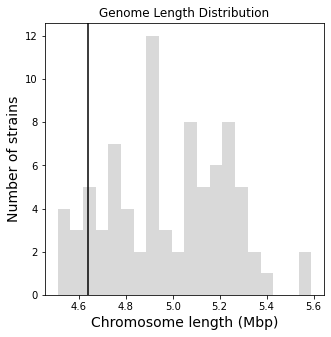

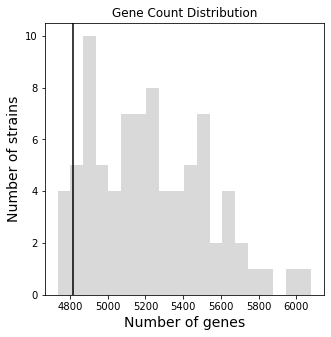

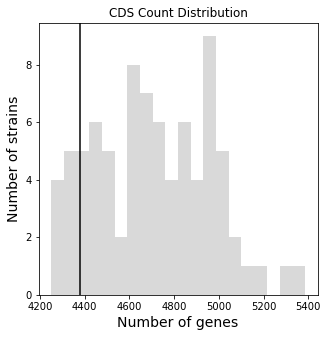

In [9]:
# Plot the distribution of genome lengths for all strains, with a vertical line indicating the 
# length of MG1655's:
FontSize = 14
plt.figure(figsize=(5,5))
plt.hist(Straininformation['chromosome_length (Mbp)'], bins = 20, color = '#d9d9d9')
plt.xlabel('Chromosome length (Mbp)', fontsize = FontSize)
plt.ylabel("Number of strains", fontsize = FontSize)
plt.axvline(Straininformation.loc['MG1655', 'chromosome_length (Mbp)'], c= 'k')
plt.title("Genome Length Distribution")

# Plot the distribution of number of genes, with a vertical line indicating the length of MG1655's:
FontSize = 14
plt.figure(figsize=(5,5))
plt.hist(Straininformation['count_All'], bins = 20, color = '#d9d9d9')
plt.xlabel('Number of genes', fontsize = FontSize)
plt.ylabel("Number of strains", fontsize = FontSize)
plt.axvline(Straininformation.loc['MG1655', 'count_All'], c= 'k')
plt.title("Gene Count Distribution")

# Plot the distribution of number of genes, with a vertical line indicating the length of MG1655's:
FontSize = 14
plt.figure(figsize=(5,5))
plt.hist(Straininformation['count_CDS'], bins = 20, color = '#d9d9d9')
plt.xlabel('Number of genes', fontsize = FontSize)
plt.ylabel("Number of strains", fontsize = FontSize)
plt.axvline(Straininformation.loc['MG1655', 'count_CDS'], c= 'k')
plt.title("CDS Count Distribution")

## Gene Statistics
Here we calculate some statistics for each gene, namely whether that gene is found in MG1655, how many of the 82 strains have *at least* one copy, and how many total copies (across all strains) were identified. We define the core genome as the set of genes found across ALL strains, and make a list of these genes.

In [10]:
# Iterate through all the genes named, and determine which if any were not identified in MG1655, and how many strains each is found in:
allgenelist=annotation_simplifiedDF['gene'].unique()
genelist = [x for x in allgenelist if str(x) != 'nan']

AbsentGenesMG1655 = []
strainCount = []
geneCount = []
for gene in genelist:
    MGcount = len(annotation_simplifiedDF.loc[(annotation_simplifiedDF['Strain'] == 'MG1655') & (annotation_simplifiedDF['gene'] == gene)])
    strainCount.append(len(set(annotation_simplifiedDF.loc[(annotation_simplifiedDF['gene'] == gene)]['Strain'].tolist())))
    geneCount.append(len(annotation_simplifiedDF.loc[(annotation_simplifiedDF['gene'] == gene)]))
    if MGcount == 0:
        AbsentGenesMG1655.append(gene)

# Create a dataframe with information on each gene's presence across strains and total copy count:        
geneFreqDF = pd.DataFrame({'Gene':genelist, 'Number of Strains':strainCount, 'Copy Count':geneCount})
display(geneFreqDF)

# Output a list with the names of the core genes:
coreGenes = geneFreqDF.loc[geneFreqDF['Number of Strains'] == 82][['Gene']]
coreGenes.to_csv('./Bakta_coreGenesList.csv')

# Print the number of genes missing (or not annotated) in MG1655:
print("Number of genes absent in MG1655: ", len(AbsentGenesMG1655))


,Gene,Number of Strains,Copy Count
0,pflD,79,91
1,hpaR,31,31
2,putA1,27,33
3,trnV,82,477
4,trnK,82,495
...,...,...,...
5633,irmA,1,1
5634,epaS1,1,1
5635,ppsE,1,1
5636,fedE,1,1


Number of genes absent in MG1655:  1361


In [181]:
# Finding genes with duplicates for testing...
counter = 0
for gene in genelist:
    while counter <= 10:
        for strain in strainlist:
            temp = annotation_simplifiedDF.loc[(annotation_simplifiedDF['Strain'] == strain) & (annotation_simplifiedDF['gene'] == gene)]
            if len(temp) > 1:
                print(gene, strain)
                counter = counter + 1
                
# DELETE EVENTUALLY?

pflD EC5
pflD EC6
pflD QOXJ01.1
pflD QOXU01.1
pflD QOXV01.1
pflD QOYI01.1
pflD QOYJ01.1
pflD QOYO01.1
pflD QOYT01.1
pflD QOYU01.1
pflD EC5
pflD EC6
pflD QOXJ01.1
pflD QOXU01.1
pflD QOXV01.1
pflD QOYI01.1
pflD QOYJ01.1
pflD QOYO01.1
pflD QOYT01.1
pflD QOYU01.1


Text(0.5, 1.0, 'Distribution of Genes Across Strains')

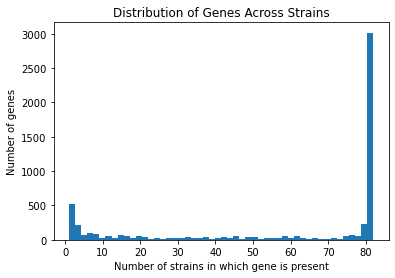

In [11]:
# Plot thgeneFreqDFibution of number of strains that each gene is found in:
# E.g., if a gene is found in only one strain, it will contribute 1 to the bar 
# above '1', while a gene found in all strains will contribute 1 to the bar above '82'.
plt.figure()
plt.hist(geneFreqDF['Number of Strains'], bins = 50)
plt.xlabel('Number of strains in which gene is present')
plt.ylabel('Number of genes')
plt.title('Distribution of Genes Across Strains')

## Code to quickly grab gene sequences:
The cell below contains a snippet of code that is useful for quickly obtaining sequences for a particular gene in particular strains.

In [ ]:
StrainsOfInterest = ['QOWN01.1', 'QOYV01.1', 'NCM3722']
GenesOfInterest = ['mhpR_2']

for strain in StrainsOfInterest:
    for gene in GenesOfInterest:
        print(">%s_%s" % (strain, gene))
        print(annotationDF.loc[(annotationDF['Strain'] == strain) & (annotationDF['Name'] == gene)]['nt_sequence'].values)
        

## Gene Alignments
Now that we've generally assessed the datasets, we'll start making gene alignments. For this, we use the commandline version of the tool muscle (specifically version ***XXX***) to perform multiple sequence alignments of all the sequences from all strains that correspond to a given gene. The alignment will be saved in the '.clw' format (matching outputs generated by 'Clustal Omega') and saved in the directory set as DIRGENEALIGNMENT in the first cell of this document. Alignments on both the amino acid sequence and the nucleotide sequence are conducted, and saved in temporary files named 'tempgeneseqaa.fasta' and 'tempgeneseqnt.fast', which are used within the loop and can safely be deleted. 

- **Time:** Roughly 5 to 10 seconds per gene (this varies with copy number and length - some very long/common sequences can take up to **XXX**). The analysis does slow down over time **(?)**, so breaking this into smaller lists can be helpful. There is one print statement per gene, displaying what gene was last analyzed, and what position this gene is in compared to the whole list. There is also a list of genes that have been analyzed (genesCompleted). In the event of a crash, these can be removed from the input list ('genelist' as of now) to resume the analysis without repetition. 
- **Resuming:** After a gene has been processed full, it will be added to the genesCompleted list. To resume an interrupted run, you can remove these genes from the input gene list, and process the remaining genes. 
- **Errors:** If an error is encountered for a gene, it will be appended to the lists genesFailedAA/genesFailedNT depending on whether the amino acid or nucleotide sequences were not aligned properly (or both!). The gene will still be listed in the genesCompleted list. Errors can arise if the input is too large (the sequences are too long or there are too many entries). If this happens, the gene name should be appended to one of the lists obove, and the issue can be handled individually. 
- **Outputs:** The following cell will output the alignment files, and can optionally output the .fasta files that serve as inputs for the alignment step. These files contain all the sequences for a gene from all strains, with each entry separated by '>X' with 'X' being the strain name. To generate these intermediate files, set SaveRegionSeq to 'True'.
- **Postprocessing:** After muscle is used to generate outputs, the alignments can be quantitatively analyzed using separate C++ code. This is done separately for speed - the alignment quantification in python can take days, but should run within ~30 minutes in the C++ version. The file where this occurs is called **XXX** and instructions for running it are located at **XXX**.


In [62]:
# Align nucleotide and amino acid coding sequences:
startTime = time.time()
SaveRegionSeq = True # If true, this will save both alignments and the alignment input files (.fasta). 
counter = 0
genesCompleted = []
genesFailedAA = []
genesFailedNT = []
for gene in genelist[1:8]:                                           # can change input list as needed
    counter = counter + 1
    print(gene, "(%s of %s genes)" % (counter, len(genelist))) # if the input list is changed, this should be too for an accurate count!
    #get aa and nt sequences for these genes
    selection_1gene=annotation_simplifiedDF.loc[annotation_simplifiedDF['gene'] ==gene]   
    assequence=[]
    ntsequence=[]
    for index, row in selection_1gene.iterrows():
        curc=annotationDF.loc[annotationDF['ID']==row['ID']]['aa_sequence']
        curnt=annotationDF.loc[annotationDF['ID']==row['ID']]['nt_sequence']
        if curc.shape[0]==1:
            if ~curc.isna().values[0]: # check that the AA sequence is not NA before adding (it will be NA for tRNA seq, etc)
                assequence.append(SeqRecord(Seq(curc.iloc[0][:-1]),id=row['Strain'],description=row['Strain']))
            if ~curnt.isna().values[0]:
                ntsequence.append(SeqRecord(Seq(curnt.iloc[0][:-3]),id=row['Strain'],description=row['Strain']))
        else:
            #error
            raise Exception("Error?")
            
    #save amino acids and nt sequences to run alignment in temporary files
    nameaatemp="tempgeneseqaa.fasta"
    namenttemp="tempgeneseqnt.fasta"
    outputdir_region = DIRGENEREGION
    with open(nameaatemp, "w") as output_handle:
        SeqIO.write(assequence, output_handle, "fasta")
    with open(namenttemp, "w") as output_handle:
        SeqIO.write(ntsequence, output_handle, "fasta")
        
        # Save the sequence files in the directory data/gene_regions, if indicted:
    if SaveRegionSeq:
        region_output_handle = ("%s/%s_nt.fasta" % (outputdir_region, gene))
        with open(region_output_handle, "w") as output_handle:
            SeqIO.write(ntsequence, output_handle, "fasta")
        region_output_handle = ("%s/%s_aa.fasta" % (outputdir_region, gene))
        with open(region_output_handle, "w") as output_handle:
            SeqIO.write(assequence, output_handle, "fasta")
        
    #run alignment
    outputdir_align = DIRGENEALIGNMENT
    if not os.path.exists(outputdir_align):
        os.makedirs(outputdir_align)
    nameaatemp_out=gene+"_aa.clw"
    namenttemp_out=gene+"_nt.clw"
    #run muscle for alignment
    if os.stat("tempgeneseqaa.fasta").st_size > 0: # check that the input fasta file is not empty. If it is, skip
        try:
            muscle_cline = MuscleCommandline(input=nameaatemp,clwout = os.path.join(outputdir_align,nameaatemp_out))
                                     #diags = True, 
                                     #maxiters = 1, 
                                     #phyiout = nameaatemp_out+".phyI",
                                     #physout = nameaatemp_out+".phyS",
                                     #log="align_log.txt")
            muscle_cline()  
        except:
            genesFailedAA.append(gene)
    if os.stat("tempgeneseqnt.fasta").st_size > 0: # check that the input fasta file is not empty. If it is, skip
        try:
            muscle_cline = MuscleCommandline(input=namenttemp,clwout = os.path.join(outputdir_align,namenttemp_out))
                                         #diags = True, 
                                         #maxiters = 1, 
                                         #phyiout = nameaatemp_out+".phyI",
                                         #physout = nameaatemp_out+".phyS",
                                         #log="align_log.txt")
            muscle_cline() 
        except:
            genesFailedNT.append(gene)
    genesCompleted.append(gene)

endTime = time.time()
print("Time elapsed: ", endTime - startTime)

hpaR (1 of 5638 genes)
putA1 (2 of 5638 genes)
trnV (3 of 5638 genes)
trnK (4 of 5638 genes)
rdlD (5 of 5638 genes)
trnR (6 of 5638 genes)
StyR-44 (7 of 5638 genes)
Time elapsed:  108.00519800186157


## Promoter Alignments

As for genes above, the promoter sequences are analysed using commandline muscle, and output in a '.clw' format in the promoter alignments directory. The fasta files for each strain are output into a file **XXX** in the DIRPROMOTERREGIONS directory. In the event that a strain has several copies of a gene, this cell will compare the sequence identity of all of them with the corresponding sequence of MG1655, and uses the entry that is the closest match for subsequent analysis. If it is absent in MG1655 ***WHAT HAPPENS HERE???***. 

There are several definitions of a promoter that can be used here, which are reflected in the 'mode' options. Modes include:
- **'real40to600':** In this mode, the region upstream of a gene is screened to find the next element (gene, end of a contig) upstream on the same strand. If there is an element within 40 bp, we assume it is in the same operon as the current gene, and this is not considered a promoter. If the region extends for at least 40 bp without another element, we assume it is a real promoter, and collect the sequence until either A) another element is encountered upstream or B) the sequence reaches 600 bp. 
- **'real40to200':** This mode is very similar to 'real40to600', but the max sequence length collected is 200 bp rather than 600 bp. 
- **'170bp_region':** In this mode, the region 170 bp upstream of a gene is identified as the promoter and included in the alignment, regardless of whether there is another element upstream.



- **Time:** Roughly 5 to 10 seconds per gene (this varies with copy number and length - some very long/common sequences can take up to **XXX**). The analysis does slow down over time **(?)**, so breaking this into smaller lists can be helpful. There is one print statement per gene, displaying what gene was last analyzed, and what position this gene is in compared to the whole list. There is also a list of genes that have been analyzed (genesCompleted). In the event of a crash, these can be removed from the input list ('genelist' as of now) to resume the analysis without repetition. 
- **Resuming:** After a gene has been processed full, it will be added to the genesCompleted list. To resume an interrupted run, you can remove these genes from the input gene list, and process the remaining genes. 
- **Errors:** If an error is encountered for a gene, it will be appended to the lists genesFailedAA/genesFailedNT depending on whether the amino acid or nucleotide sequences were not aligned properly (or both!). The gene will still be listed in the genesCompleted list. Errors can arise if the input is too large (the sequences are too long or there are too many entries). If this happens, the gene name should be appended to one of the lists obove, and the issue can be handled individually. 
- **Postprocessing:** After muscle is used to generate outputs, the alignments can be quantitatively analyzed using separate C++ code. This is done separately for speed - the alignment quantification in python can take days, but should run within ~30 minutes in the C++ version. The file where this occurs is called **XXX** and instructions for running it are located at **XXX**.


In [73]:
## 2024-01-22 *Real* Promoter Region Extraction
## 2024-02-26 *updated*: 
# This code was altered so that start sites within a gene region will be recognized as well to correct for the 
# errors with overlapping genes in operons in the previous version. I also will change the max length to 600 bp 
# upstream based on analysis of promoter region lengths in regulonDB (dicussed in '2024-02_promoterAnalysis' 
# slides).

# If errors are encountered, regenerate annotationDF at the top, there's probably just an issue with indexing. 


# indicate gene list, strain list, and mode
genelist = ['malX'] # fliO: 3nt upstrem, fliL:
strainlist = annotation_simplifiedDF['Strain'].to_numpy().tolist()
mode = "real40to600" #"170bp_region" # mode options for this cell include: "170bp_region" and "real40to200"



DIRPROMOTERREGION="data/promoter_regions"                        
dirout=DIRPROMOTERREGION                        # This is where temporary files are located
DIRPROMOTERALIGNMENT="data/promoter_alignments"       # This is where the final output alignments will be saved

#prepare DF and empty list to save information
#promotorregion_info = pd.DataFrame(columns=['Strain','promoterregion','promoter_gene1','promoter_gene1_strand','promoter_gene2','promoter_gene2_strand','promoterlength','seq_id','promoter_pos_gene1','promoter_pos_gene2','sequence'])
absentInMG = []
problems = []

#make a set that contains all the gene names (including duplicates!) and remove the non-string 'nan'
allgenelist = set(annotation_simplifiedDF['gene'].tolist())
allgenelist = [x for x in allgenelist if str(x) != 'nan']

counter = 0
# actually start the process
for gene in ['malX']:#allgenelist:
    counter = counter + 1
    promotorregion_info = pd.DataFrame(columns=['Strain','promoterregion','promoter_gene1','promoter_gene1_strand','promoter_gene2','promoter_gene2_strand','promoterlength','seq_id','promoter_pos_gene1','promoter_pos_gene2','sequence'])

    print(gene)
    
    # find all aliases of the gene:
    geneAlias = []
    for entry in allgenelist:
        if gene in entry:
            if "_" in entry:
                geneAlias.append(entry)
    
    # make a DF with all instances of a gene/alias for all strains: 
    selection_1gene=annotation_simplifiedDF.loc[annotation_simplifiedDF['gene'] ==gene].copy()   
    for alias in geneAlias:
        if alias == gene:
            continue
        else:
            selection_1geneSINGLE = annotation_simplifiedDF.loc[annotation_simplifiedDF['gene'] == alias].copy()
            selection_1gene = pd.concat((selection_1gene, selection_1geneSINGLE))
            
    #check that a MG1655 sequence is present:
    alignMG = True
    if len(selection_1gene.loc[selection_1gene['Strain'] == 'MG1655']) <1:
        print("Error! No %s found in MG1655!" % gene)
        alignMG = False
        absentInMG.append(gene)
        
        
        ##### WORKING UNDER HERE!!! #####
        
        
        
    # if there is a MG1655 sequence, make a list of each strain included in selection_1gene. See how many entries there are,
    # and if needed, do an alignment to find the closest match:
    if alignMG == True:
        strainlist = set(selection_1gene['Strain'].tolist())
        
        for strain in strainlist:
          #  print(strain)
            tempdf = selection_1gene.loc[selection_1gene['Strain'] == strain]
            
            # CASE 1: 0 copies of gene in strain:
            if len(tempdf) < 1:
                raise exception("Error! Strain %s does not contain gene %s" % (strain, gene))
                
            # CASE 2: 1 copy of gene in strain:    
            elif len(tempdf) == 1:
                #print("Only one copy in %s" % strain)
                select = tempdf
            
            # CASE 3: >1 copy of gene in strain
            elif len(tempdf) > 1:
                print("%s has %s copies of %s" % (strain, len(tempdf), gene))
                # if alignment of multiple copies is needed, then we'll add MG1655 to the table, and make the alignment:
                tempdf = pd.concat((tempdf, selection_1gene.loc[selection_1gene['Strain'] == 'MG1655']))
                #align all sequences (only if MG1655 was found)
                assequence=[]
                ntsequence=[]
                for index, row in tempdf.iterrows():
                    #curc=annotationDF.loc[annotationDF['ID']==row['ID']]['aa_sequence']
                    curnt=annotationDF.loc[annotationDF['entryID']==row['entryID']]['nt_sequence']
                    if curnt.shape[0]==1:
                       # print(row)
                        #assequence.append(SeqRecord(Seq(curc.iloc[0][:-1]),id=row['Strain'] + "*" + str(row["ID"]),description=str(row['ID']))) # <- added row'ID' to description here 2023-06-22...
                        ntsequence.append(SeqRecord(Seq(curnt.iloc[0][:-3]),id=row['Strain'] + "*" + str(row["entryID"]),description=str(row['entryID'])))
                    else:
                        #error
                        raise Exception("Error?")
                #save amino acids and nt sequences to run alignment in temporary files
                #nameaatemp=dirout + "/tempgeneseqaa.fasta"
                namenttemp=dirout + "/tempgeneseqnt.fasta"
                # with open(nameaatemp, "w") as output_handle:
                #     SeqIO.write(assequence, output_handle, "fasta")
                with open(namenttemp, "w") as output_handle:
                    SeqIO.write(ntsequence, output_handle, "fasta")
                #run alignment
                #output
                outputdir_align=dirout
                if not os.path.exists(outputdir_align):
                    os.makedirs(outputdir_align)
                #nameaatemp_out="temp_aa.clw" #gene+"_aa.clw"
                namenttemp_out="temp_nt.clw" #gene+"_nt.clw"
                #run muscle for alignment
                # muscle_cline = MuscleCommandline(input=nameaatemp,clwout = os.path.join(outputdir_align,nameaatemp_out))
                #                                  #diags = True, 
                #                                  #maxiters = 1, 
                #                                  #phyiout = nameaatemp_out+".phyI",
                #                                  #physout = nameaatemp_out+".phyS",
                #                                  #log="align_log.txt")
                # muscle_cline()    
                muscle_cline = MuscleCommandline(input=namenttemp,clwout = os.path.join(outputdir_align,namenttemp_out))
                                                 #diags = True, 
                                                 #maxiters = 1, 
                                                 #phyiout = nameaatemp_out+".phyI",
                                                 #physout = nameaatemp_out+".phyS",
                                                 #log="align_log.txt")
                muscle_cline() 
                
                # after the alignment is made, we'll read it in and compare the non-MG1655 values to MG1655's to find the best match:                
                #read in alignment files 
                
                # THIS IS FOR NT!!! CHANGE/DUPLICATE IF YOU WANT TO LOOK AT AA INSTEAD!
                
                charlist=list("ACTG-") #
                gene_alignmentdata = pd.DataFrame(columns=['gene','Strain1', 'Strain2','count_SNP','count_NT_GAP','NT_alignment_length', 'seq_id'])
                alignmentfilepath=os.path.join(outputdir_align, namenttemp_out)
                alignment = AlignIO.read(open(alignmentfilepath), 'clustal')
                lengthal=alignment.get_alignment_length()
                
                #iterate through the alignments and populate gene_alignmentdata DF with gap/snp/length/seqID data:
                for record1 in alignment:
                    for record2 in alignment:
                        y=0
                        gap=0
                        if len(record1) != len(record2):
                            #error
                            raise Exception("Alignment entry lengths do not match!")
                        for pos in range(0,len(record1)):
                            if record1[pos] != record2[pos]:   #I'm no sure if this perfectly matches my definintion of a gap, 
                                if record1[pos]=="-":          # but for this purpose, any non-matching character should be treated
                                    gap=gap+1                  # the same anyways.
                                elif record1[pos] in charlist:
                                    y=y+1
                                else:
                                    warn("Warning: character not known")
                        gene_alignmentdata.loc[len(gene_alignmentdata)] = [gene,record1.id,record2.id,y,gap,lengthal, 1 - (y + gap) / lengthal]
                print(gene_alignmentdata.shape)

                #split 'Strain1' and 'Strain2' columns to add row ID
                gene_alignmentdata[["Strain1", "index1"]] = gene_alignmentdata["Strain1"].str.split("*", expand=True)
                gene_alignmentdata[["Strain2", "index2"]] = gene_alignmentdata["Strain2"].str.split("*", expand=True)
                
                
                #find rows with both MG1655 and other strain, and determine which has the maximal seqID (if equal, take the first):
                tempDF = gene_alignmentdata.loc[(gene_alignmentdata['Strain1'] == "MG1655") & (gene_alignmentdata['Strain2'] == strain)]
                if len(tempDF) > 1:
                    print("Length is: ", len(tempDF))
                    bestMatchID = tempDF.loc[tempDF['seq_id'] == max(tempDF['seq_id'])]['index2']
                    # if there are multiple entries with the same maximum seqID value, then the first one listed will be used:
                    if len(bestMatchID) > 1:
                        bestMatchID = bestMatchID.iloc[[0]]
                    #display(tempDF)
                    
                #using the bestMatchID, select the row corresponding to the best match from annotationDF, and find promoter:    
                #select=annotationDF.iloc[int(bestMatchID),:].copy()
                select = annotation_simplifiedDF.iloc[[int(bestMatchID.iloc[0])]]
                #print(select)
                
                
            
            
            ##################################################
            # After handling different copy number issues, use the output 'select' DF to actually extract the promoter info:
            if len(select) > 1:
                raise Exception("ERROR: 'select' DF should contain 1 entry, but has %s" % len(select))
            if len(select) <1:
                raise Exception("ERROR: 'select' DF should contain 1 entry, but has %s" % len(select))
            start=select['start'].values[0]
            stop=select['end'].values[0]
            strand=select['strand'].values[0]
            if strand == "-":
                startpoint=stop
            elif strand == "+":
                startpoint=start
            else:
                raise Exception("ERROR: Strand is neither + nor -")
            seq_id=select['seq_id'].values[0]
            
            # for now, only allowing mode to be 170bp_region.
            if mode=="170bp_region": 
                skipprun = False
                promoterregion_length=mode
                if strand=="+":
                    endpoint=startpoint-120
                    startpoint += 50
                elif strand=="-":
                    endpoint=startpoint+120
                    startpoint -= 50
                if endpoint<0:# or endpoint >=
                    skipprun=True
                if startpoint<0:
                    skipprun=True
                if skipprun==False:
                    out=SEQTOOLS.get_sequences_region("data/annotationresults/" + strain + ".fasta",seq_id,startpoint,endpoint)
                    if endpoint>startpoint:
                        sequencec=str(out.reverse_complement())
                    else:
                        sequencec=str(out)
                    promoterregionname=str(gene)+"_"+str(mode)
                    promotorregion_info.loc[len(promotorregion_info)] = [strain,promoterregionname,gene,strand,np.nan,np.nan, mode,seq_id,startpoint,endpoint,sequencec]
            ###        promotorregion_info.loc[promotorregion_info['promoterregion']==promoterregionname].to_csv(os.path.join(dirout,"promoterregions_"+promoterregionname+".csv"))
            
            
            # This is a mode that will check for any start/stop sites upstream of the gene of interest within 40 nt. It there is
            # one, the gene is assumed to be found within an operon and to NOT have a proper promoter or RBS upstream. If there
            # isn't a gene start'stop within this region, then the sequence between the start codon and the the next upstream element
            # OR 600 bp upstream is taken as the promoter sequence. 
            if mode == "real40to600":
                skipprun=False
                # 1. Identify the closest gene start/stop to the gene of interest's start:
                if strand=="+":
                    select2=annotationDF.loc[(annotationDF['Strain']==strain) & (annotationDF['seq_id']==seq_id) & (annotationDF['gene']!=gene) & (annotationDF['start']<startpoint) & (annotationDF['end']<startpoint)]
                elif strand=="-":
                    select2=annotationDF.loc[(annotationDF['Strain']==strain) & (annotationDF['seq_id']==seq_id) & (annotationDF['gene']!=gene) & (annotationDF['start']>startpoint) & (annotationDF['end']>startpoint)]
                
                # If there is a gene that straddles the start site, skip run:
                selGene = select['gene'].values[0]
                overlapping=annotationDF.loc[(annotationDF['Strain']==strain) & (annotationDF['seq_id']==seq_id) & (annotationDF['gene']!=selGene) & (((annotationDF['start']<=startpoint) & (annotationDF['end']>=startpoint)) | ((annotationDF['start']>=startpoint) & (annotationDF['end']<=startpoint)))]
                if overlapping.shape[0] > 0:
                    skipprun = True
                    print('overlapping stuff')
                
                # If there are other genes upstream...   # switch to 'elif' below?
                if select2.shape[0]>0:
                    closestothergeneByStart = select2.iloc[(select2['start']-startpoint).abs().argsort()].iloc[0]
                    closestothergeneByStop = select2.iloc[(select2['end']-startpoint).abs().argsort()].iloc[0]
                    if closestothergeneByStart['start'] == closestothergeneByStop['start']:
                        closestothergene = closestothergeneByStart
                    elif np.absolute(closeststart['start']-startpoint) < np.absolute(closeststop['end']-startpoint):
                        closestothergene = closestothergeneByStart
                    elif np.absolute(closeststart['start']-startpoint) > np.absolute(closeststop['end']-startpoint):
                        closestothergene = closestothergeneByStop
                    else:
                        warnings.warn("Closest start gene != closest stop gene, but they are the same distance away.")
                        
                # If there are not other genes upstream, the DF entry for 'closestothergene' will be filled in with nans and 
                # the end of the contig. I am NOT checking the length here, since we don't know if there's a gene immediately
                # after of not, so even contig ends within 40 nt will be output. This can be changed.
                else:
                    print("Warning: no other gene in upstream: Strain "+strain+" ; Contig "+seq_id+" ; Gene:"+gene)
                    warnings.warn("Warning: no other gene in contig!")

                    if strand=="+":
                        contigEnd = 0
                    if strand=="-":
                        contigEnd = SEQTOOLS.get_contig_length("data/annotationresults/" + strain + ".fasta", seq_id)

                    # Initialize closest other gene with 'nan' for unused fields:
                    closestothergene['source', 'type', 'score', 'phase', 'attributes', 'ID', 'db_xref', 'eC_number', 'inference',
                     'locus_tag', 'note', 'product', 'rpt_family', 'rpt_type', 'rpt_unit_seq', 'aa_sequence','nt_sequence'] = np.nan
                    # Add correct values for the contig end for seq_id, strain, start/end, strand, names...
                    closestothergene['seq_id'] = seq_id                        # same as the main gene
                    closestothergene['strain'] = strain                          # same as the main gene
                    closestothergene['strand'] = strand                        # since start=stop, doesn't make a difference, but same as the main strain
                    closestothergene['start', 'end'] = contigEnd
                    closestothergene['Name', 'gene'] = "CONTIG_END"
                    
                    
                if skipprun==False:
                    #print(closestothergene)
                    closestothergene_start=closestothergene["start"]
                    closestothergene_end=closestothergene["end"]
                    closestothergene_strand=closestothergene["strand"]
                    
                    #find start and end of closest gene which is closest to the original gene
                    if np.abs(closestothergene_start-startpoint)<np.abs(closestothergene_end-startpoint):
                        startpoint_gene2=closestothergene_start
                    else:
                        startpoint_gene2=closestothergene_end
                    promoterregion_length=np.abs(startpoint_gene2-startpoint)

                    if promoterregion_length < 40:
                        continue
                    # if promoterregion_length>2000:
                        # print("Warning: very long promoter region. Strain "+strain+" ; Contig "+seq_id+" ; Gene:"+gene+" ; length:" + promoterregion_length)
                        # warnings.warn("Warning: very long promoter region!")
                        
                        
                        ###############################################################################
                        ###############################################################################
                        ### ^ THIS IS A GOOD PLACE TO CORRECT/TRIM PROMOTOERS TO ONLY REACH 200 NT! ###
                        ###############################################################################
                        ###############################################################################
                        
                    elif (startpoint_gene2 < startpoint) & (startpoint - startpoint_gene2 > 600):
                        startpoint_gene2 = startpoint - 600
                    elif (startpoint_gene2 > startpoint) & (startpoint_gene2 - startpoint > 600):
                        startpoint_gene2 = startpoint + 600
                    
                    promoterregion_length = np.abs(startpoint_gene2-startpoint)
                    
                    promoterregion_nextgene=closestothergene['gene']
                    out=SEQTOOLS.get_sequences_region("data/annotationresults/"+strain+".fasta",seq_id,startpoint,startpoint_gene2)
                    if startpoint_gene2>startpoint:
                        sequencec=str(out.reverse_complement())
                    else:
                        sequencec=str(out)
                    
                    # Name the outputbased on only the GOI:
                    promoterregionname=str(gene)+"_realPromoter40to200"
                    promotorregion_info.loc[len(promotorregion_info)] = [strain,promoterregionname,gene,strand,promoterregion_nextgene,closestothergene_strand, promoterregion_length,seq_id,startpoint,startpoint_gene2,sequencec]

            # Now that we have DF with a maximum of one entry per gene per strain, we will go through, make a temporary 
            # fasta file with the promoter sequences, and then make a CLW format alignment
            
            #output is alignment file (clw format)

            #get aa and nt sequences for these genes
            ntsequence=[]
            for index, row in promotorregion_info.iterrows():
                # curnt=annotationDF.loc[annotationDF['ID']==index]
                curnt_seq = row['sequence']
                # if curnt.shape[0]==1: # changed from curc to promotorregioninfo on 2023-09-26?
                ntsequence.append(SeqRecord(Seq(curnt_seq),id=row['Strain'],description=row['Strain']))
                # else:
                #    #error
                #    raise Exception("Error?")
                    
                    # 2024-01-22: I don't understand what the validation step above is for... At this point
                    # we're just converting the infro from the promotorregion_info df into a fasta file, so 
                    # I think it is safe to go row by row and just... do that? As I recall, this exception 
                    # was never raised, on the the 'curc' issue...
                    # 
                    # I will comment out this check, run everything, and compare outputs from today with the
                    # 11-07 run to confirm that the data matches. 
                    
            #save amino acids and nt sequences to run alignment in temporary files
            namenttemp=os.path.join(dirout,"tempgeneseqnt.fasta")
            with open(namenttemp, "w") as output_handle:
                SeqIO.write(ntsequence, output_handle, "fasta")
            #run alignment
            #output
            outputdir_align=DIRPROMOTERALIGNMENT
            if not os.path.exists(outputdir_align):
                os.makedirs(outputdir_align)
            namenttemp_out=gene+"_"+mode+"_nt.clw"
            #run muscle for alignment  
            muscle_cline = MuscleCommandline(input=namenttemp,clwout = os.path.join(outputdir_align,namenttemp_out))
                                             #diags = True, 
                                             #maxiters = 1, 
                                             #phyiout = nameaatemp_out+".phyI",
                                             #physout = nameaatemp_out+".phyS",
                                             #log="align_log.txt")
            try:
                muscle_cline() 
            except:
                problems.append([gene,strain])
            #muscle_cline()
            if counter%100 == 0:
                print("Counter: %s" % counter)
    
    
    
promotorregion_info



# based on a quick test in the terminal, the shasums are different, and I think the alignments are different in a trivial way , 
# but the sequences are the same (based on random visual checks of about 5 cases, so nothing comprehensive...)


malX
overlapping stuff
overlapping stuff
overlapping stuff
QOWT01.1 has 2 copies of malX
(9, 7)
Length is:  2
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
QOWQ01.1 has 2 copies of malX
(9, 7)
Length is:  2
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
overlapping stuff
QOWS01.1 has 2 copies of malX

/var/folders/v3/dg936b8s0p594tmb2wm_9gsm0000gq/T/ipykernel_49472/573726235.py:265: UserWarning: Warning: no other gene in contig!
  warnings.warn("Warning: no other gene in contig!")


UnboundLocalError: local variable 'sequencecur' referenced before assignment

In [77]:
SEQTOOLS.get_contig_length("data/annotationresults/QOWS01.1.fasta", seq_id)

UnboundLocalError: local variable 'sequencecur' referenced before assignment

In [78]:
seq_id

'contig_262'

In [68]:
gene_alignmentdata

,gene,Strain1,Strain2,count_SNP,count_NT_GAP,NT_alignment_length,seq_id,index1,index2
0,malX,QOWT01.1,QOWT01.1,0,0,1618,1.00000,IKPOJJ_02070,IKPOJJ_02070
1,malX,QOWT01.1,MG1655,0,0,1618,1.00000,IKPOJJ_02070,KOIAIB_08640
2,malX,QOWT01.1,QOWT01.1,689,28,1618,0.55686,IKPOJJ_02070,IKPOJJ_23770
3,malX,MG1655,QOWT01.1,0,0,1618,1.00000,KOIAIB_08640,IKPOJJ_02070
4,malX,MG1655,MG1655,0,0,1618,1.00000,KOIAIB_08640,KOIAIB_08640
5,malX,MG1655,QOWT01.1,689,28,1618,0.55686,KOIAIB_08640,IKPOJJ_23770
6,malX,QOWT01.1,QOWT01.1,602,115,1618,0.55686,IKPOJJ_23770,IKPOJJ_02070
7,malX,QOWT01.1,MG1655,602,115,1618,0.55686,IKPOJJ_23770,KOIAIB_08640
8,malX,QOWT01.1,QOWT01.1,0,0,1618,1.00000,IKPOJJ_23770,IKPOJJ_23770


In [103]:
annotationDF.loc[(annotationDF['gene'] == 'malX') & (annotationDF['Strain'] == 'EC5')]


,Unnamed: 0,seq_id,source,type,start,end,score,strand,phase,attributes,...,K12 name,aa_sequence,nt_sequence,Strain,Is_circular,COG,GO,RFAM,UniRef,entryID
401558,5043,contig_257,Prodigal,CDS,100421.0,102013.0,.,+,0,ID=ABLIKM_23495;Name=K12malX;locus_tag=ABLIKM_...,...,malX,MTAKTAPKVTLWEFFQQLGKTFMLPVALLSFCGIMLGIGSSLSSHD...,ATGACGGCGAAAACAGCACCGAAAGTCACGCTGTGGGAGTTCTTCC...,EC5,NaN,"COG1264, G","0005886, 0008982, 0009401, 0009758, 0016301, ...",NaN,"UniRef100_A0A0D8VXD7, UniRef50_P19642, UniRef...",401558


In [102]:
OLDannotationDF.loc[(OLDannotationDF['gene'] == 'malX_1') & (OLDannotationDF['Strain'] == 'EC5')]

,seq_id,source,type,start,end,score,strand,phase,attributes,ID,...,inference,locus_tag,note,product,rpt_family,rpt_type,rpt_unit_seq,aa_sequence,nt_sequence,Strain
234724,k141_216,Prodigal:002006,CDS,5024.0,6580.0,.,+,0,ID=KEHDNFPL_02627;Name=malX_1;gene=malX_1;infe...,234724,...,"ab initio prediction:Prodigal:002006,similar t...",KEHDNFPL_02627,NaN,PTS enzyme IIBC component MalX,NaN,NaN,NaN,MMQIFSGASSGAWFEKAQRFGKSFMLPIAVLPAAGLLLGIGGALSN...,ATGATGCAAATATTTAGCGGCGCTTCGTCAGGCGCATGGTTTGAAA...,EC5


In [107]:
OLDannotationDF.loc[(OLDannotationDF['gene'] == 'malX_2') & (OLDannotationDF['Strain'] == 'EC5')]

,seq_id,source,type,start,end,score,strand,phase,attributes,ID,...,inference,locus_tag,note,product,rpt_family,rpt_type,rpt_unit_seq,aa_sequence,nt_sequence,Strain
235011,k141_155,Prodigal:002006,CDS,259108.0,260688.0,.,-,0,ID=KEHDNFPL_02914;Name=malX_2;gene=malX_2;infe...,235011,...,"ab initio prediction:Prodigal:002006,similar t...",KEHDNFPL_02914,NaN,PTS enzyme IIBC component MalX,NaN,NaN,NaN,MKQKKAWSFFQSLGKAFMYPIALLSVCGMMLGLGSGLASDDMAKLI...,ATGAAACAAAAGAAAGCCTGGAGTTTTTTTCAGAGCCTGGGGAAGG...,EC5


In [108]:
annotationDF.head()

,Unnamed: 0,seq_id,source,type,start,end,score,strand,phase,attributes,...,K12 name,aa_sequence,nt_sequence,Strain,Is_circular,COG,GO,RFAM,UniRef,entryID
0,0,contig_1,Bakta,region,1.0,526552.0,.,+,.,ID=contig_1;Name=contig_1,...,NaN,NaN,NaN,QOXH01.1,NaN,NaN,NaN,NaN,NaN,0
1,1,contig_1,PILER-CR,CRISPR,114.0,579.0,.,?,.,ID=ICOLJDFBHL_337;Name=CRISPR array with 8 rep...,...,NaN,NaN,CGGTTTATCCCCGCTGGCGCGGGGAACTCCCAGGGCGACCAGCGCC...,QOXH01.1,NaN,NaN,NaN,NaN,NaN,1
2,2,contig_1,PILER-CR,crispr-repeat,114.0,142.0,.,?,.,ID=ICOLJDFBHL_337_repeat_1;Parent=ICOLJDFBHL_337,...,NaN,NaN,CGGTTTATCCCCGCTGGCGCGGGGAACTC,QOXH01.1,NaN,NaN,NaN,NaN,NaN,2
3,3,contig_1,PILER-CR,crispr-spacer,143.0,174.0,.,?,.,ID=ICOLJDFBHL_337_spacer_1;Parent=ICOLJDFBHL_3...,...,NaN,NaN,CCAGGGCGACCAGCGCCACCAGAATTAATAAT,QOXH01.1,NaN,NaN,NaN,NaN,NaN,3
4,4,contig_1,PILER-CR,crispr-repeat,175.0,203.0,.,?,.,ID=ICOLJDFBHL_337_repeat_2;Parent=ICOLJDFBHL_337,...,NaN,NaN,CGGTTTATCCCCGCTGGCGCGGGGAACTC,QOXH01.1,NaN,NaN,NaN,NaN,NaN,4
